### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 📘 Informe de análisis – Alura Store



# 📘 Introducción

El presente análisis tiene como propósito apoyar al Sr. Juan en una decisión estratégica: **elegir cuál tienda de la cadena Alura Store debe vender** para emprender una nueva etapa comercial.

Para ello, se ha realizado un estudio comparativo de desempeño entre las cuatro tiendas de la red, tomando en cuenta factores clave como:

- 🔹 Facturación total
- 🔹 Distribución de ventas por categoría
- 🔹 Calificaciones promedio otorgadas por clientes
- 🔹 Productos con mayor y menor rotación
- 🔹 Costo de envío promedio

Este conjunto de métricas nos permitira detectar cuál tienda presenta **menor eficiencia operativa y comercial**, y fundamentar una recomendación clara y objetiva.


## 🧮 Análisis de facturación



In [ ]:
def calcular_facturacion(tienda):
    return tienda["Precio"].sum()
fact1 = calcular_facturacion(tienda)
fact2 = calcular_facturacion(tienda2)
fact3 = calcular_facturacion(tienda3)
fact4 = calcular_facturacion(tienda4)

print("📊 Facturación total por tienda:")
print(f"  - Tienda 1: ${round(fact1, 2):,.2f}")
print(f"  - Tienda 2: ${round(fact2, 2):,.2f}")
print(f"  - Tienda 3: ${round(fact3, 2):,.2f}")
print(f"  - Tienda 4: ${round(fact4, 2):,.2f}")
facturacion = {
    "Tienda 1": fact1,
    "Tienda 2": fact2,
    "Tienda 3": fact3,
    "Tienda 4": fact4
}


📊 Facturación total por tienda:
  - Tienda 1: $1,150,880,400.00
  - Tienda 2: $1,116,343,500.00
  - Tienda 3: $1,098,019,600.00
  - Tienda 4: $1,038,375,700.00


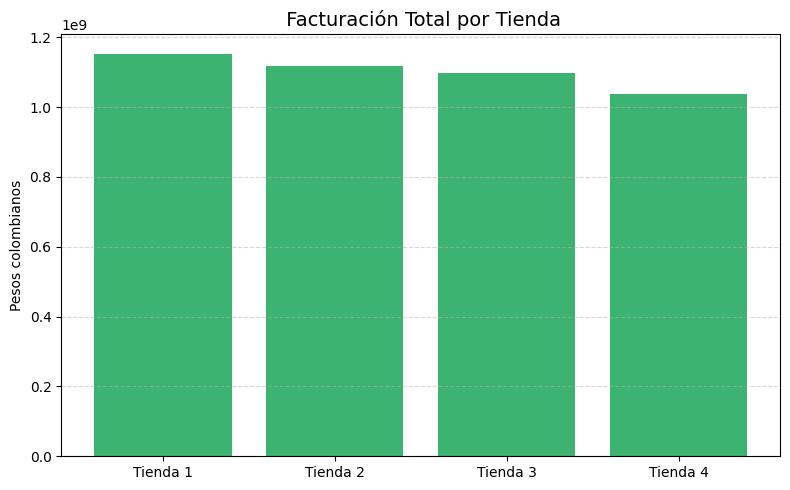

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(facturacion.keys(), facturacion.values(), color="mediumseagreen")

plt.title(" Facturación Total por Tienda", fontsize=14)
plt.ylabel("Pesos colombianos")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 📌 La facturación total es un indicador clave del desempeño comercial de cada tienda.
En este análisis se observa que:

**Tienda 1** lidera con la mayor facturación, superando los $1.150 millones de pesos.

Le siguen **Tienda 2** y **Tienda 3**, con niveles cercanos pero ligeramente inferiores.

**Tienda 4** presenta la facturación más baja, con $1.038 millones de pesos, marcando una diferencia significativa respecto a las demás.

Esta brecha de ingresos sugiere que **Tienda 4 podría ser menos eficiente comercialmente**, ya sea por menor volumen de ventas, rotación de productos o nivel de atracción al cliente.


# 📦 Ventas por categoría

In [ ]:
import pandas as pd

def obtener_top_categorias(df, nombre_tienda):
    categorias = df["Categoría del Producto"].value_counts().head(5)
    return pd.DataFrame({
        "Categoría": categorias.index,
        nombre_tienda: categorias.values
    })

# Obtener tablas individuales
tabla1 = obtener_top_categorias(tienda, "Tienda 1")
tabla2 = obtener_top_categorias(tienda2, "Tienda 2")
tabla3 = obtener_top_categorias(tienda3, "Tienda 3")
tabla4 = obtener_top_categorias(tienda4, "Tienda 4")

# Combinar todas las tablas
tabla_comparativa = pd.merge(tabla1, tabla2, on="Categoría", how="outer")
tabla_comparativa = pd.merge(tabla_comparativa, tabla3, on="Categoría", how="outer")
tabla_comparativa = pd.merge(tabla_comparativa, tabla4, on="Categoría", how="outer")

# Rellenar valores faltantes con cero
tabla_comparativa = tabla_comparativa.fillna(0).astype({"Tienda 1": int, "Tienda 2": int, "Tienda 3": int, "Tienda 4": int})

# Mostrar tabla
print("\n🧮 Ventas por Categoría por Tienda (Top 5)")
print(tabla_comparativa.to_markdown(index=False))




🧮 Ventas por Categoría por Tienda (Top 5)
| Categoría            |   Tienda 1 |   Tienda 2 |   Tienda 3 |   Tienda 4 |
|:---------------------|-----------:|-----------:|-----------:|-----------:|
| Deportes y diversión |        284 |        275 |        277 |        277 |
| Electrodomésticos    |        312 |        305 |        278 |        254 |
| Electrónicos         |        448 |        422 |        451 |        451 |
| Juguetes             |        324 |        313 |        315 |        338 |
| Muebles              |        465 |        442 |        499 |        480 |


#### 🔍 Observaciones:

- La categoría **Muebles** lidera en todas las tiendas, especialmente en **Tienda 3 (499 unidades)**, lo que puede indicar especialización o mayor demanda en ese segmento.
- **Electrónicos** también tienen alto volumen, con Tienda 3 y Tienda 4 empatadas en 451 unidades.
- **Tienda 4** se destaca sutilmente en **Juguetes (338 unidades)**, siendo la única en superar a las demás en esa categoría.
- La categoría más débil para todas las tiendas es **Electrodomésticos**, donde **Tienda 4** tiene el volumen más bajo (**254 unidades**), lo que podría reflejar menor rotación o una oferta menos competitiva.

####  Relevancia para la decisión:

Este análisis muestra que aunque **Tienda 4 tiene buen desempeño en juguetes**, en el resto de categorías clave su rendimiento es inferior. Particularmente en **Electrodomésticos**, la diferencia respecto a otras tiendas es notable. Combinado con datos de facturación y satisfacción, esto aporta evidencia de menor eficiencia comercial.

# ⭐ Calificación promedio


In [ ]:
# Tienda 1
prom1 = tienda["Calificación"].mean()
print("Tienda 1:", round(prom1, 2))

# Tienda 2
prom2 = tienda2["Calificación"].mean()
print("Tienda 2:", round(prom2, 2))

# Tienda 3
prom3 = tienda3["Calificación"].mean()
print("Tienda 3:", round(prom3, 2))

# Tienda 4
prom4 = tienda4["Calificación"].mean()
print("Tienda 4:", round(prom4, 2))


Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


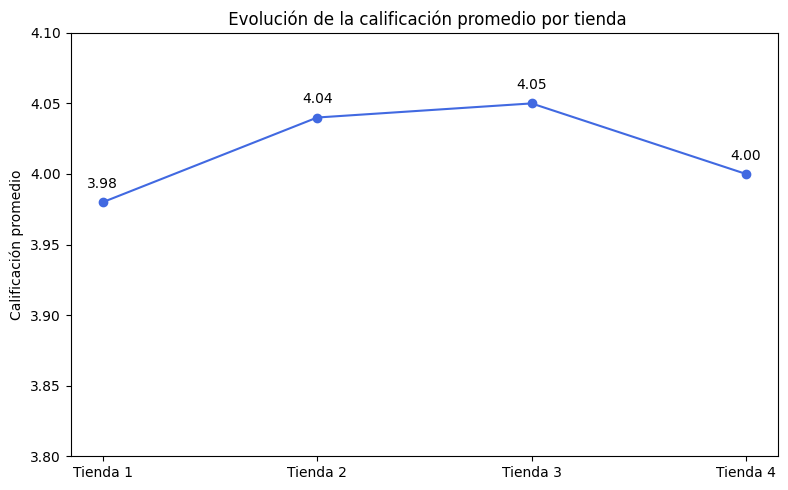

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(tiendas, calificaciones, marker='o', linestyle='-', color='royalblue')
plt.title(' Evolución de la calificación promedio por tienda')
plt.ylabel('Calificación promedio')
plt.ylim(3.8, 4.1)

# Etiquetas
for i, val in enumerate(calificaciones):
    plt.text(tiendas[i], val + 0.01, f"{val:.2f}", ha='center')

plt.tight_layout()
plt.show()





### ⭐ Calificación promedio por tienda

La siguiente gráfica muestra la calificación promedio que los clientes han otorgado a cada tienda, lo cual es un indicador clave de satisfacción:

- **Tienda 3** es la mejor evaluada con **4.05**, lo que sugiere una experiencia muy positiva para los clientes.
- **Tienda 2** y **Tienda 4** también mantienen niveles altos de satisfacción.
- **Tienda 1** tiene la calificación más baja (**3.98**), lo cual podría indicar áreas de mejora en atención, calidad o manejo de expectativas.



# 🔝 Productos más y menos vendidos

In [ ]:
def mostrar_top_bottom(nombre, top, bottom):
    print(f"🔝 Top 5 productos más vendidos - {nombre}:")
    for producto, cantidad in top.items():
        print(f"  - {producto}: {cantidad} ventas")

    print(f"\n🔻 5 productos menos vendidos - {nombre}:")
    for producto, cantidad in bottom.items():
        print(f"  - {producto}: {cantidad} ventas")

    print("\n" + "="*50 + "\n")

# Usarla así:
mostrar_top_bottom("Tienda 1", top5_1, bottom5_1)
mostrar_top_bottom("Tienda 2", top5_2, bottom5_2)
mostrar_top_bottom("Tienda 3", top5_3, bottom5_3)
mostrar_top_bottom("Tienda 4", top5_4, bottom5_4)


🔝 Top 5 productos más vendidos - Tienda 1:
  - Microondas: 60 ventas
  - TV LED UHD 4K: 60 ventas
  - Armario: 60 ventas
  - Secadora de ropa: 58 ventas
  - Mesa de noche: 56 ventas

🔻 5 productos menos vendidos - Tienda 1:
  - Ciencia de datos con Python: 39 ventas
  - Pandereta: 36 ventas
  - Olla de presión: 35 ventas
  - Auriculares con micrófono: 33 ventas
  - Celular ABXY: 33 ventas


🔝 Top 5 productos más vendidos - Tienda 2:
  - Iniciando en programación: 65 ventas
  - Microondas: 62 ventas
  - Batería: 61 ventas
  - Guitarra acústica: 58 ventas
  - Pandereta: 58 ventas

🔻 5 productos menos vendidos - Tienda 2:
  - Auriculares: 37 ventas
  - Sillón: 35 ventas
  - Mesa de comedor: 34 ventas
  - Impresora: 34 ventas
  - Juego de mesa: 32 ventas


🔝 Top 5 productos más vendidos - Tienda 3:
  - Kit de bancas: 57 ventas
  - Mesa de comedor: 56 ventas
  - Cama king: 56 ventas
  - Set de ollas: 55 ventas
  - Mesa de noche: 55 ventas

🔻 5 productos menos vendidos - Tienda 3:
  - Guitar

#### 🔝 Top 5 Productos Más Vendidos

- **Diversidad por tienda**: Aunque algunas categorías se repiten, cada tienda muestra preferencias marcadas:
  - **Tienda 1**: Domina con productos del hogar como *Microondas*, *TV*, *Armario* y *Secadora*.
  - **Tienda 2**: Llama la atención por incluir libros (*Iniciando en programación*) y música (*Guitarra acústica* y *Pandereta*), lo que sugiere un perfil más diverso y orientado a estilo de vida.
  - **Tienda 3**: Se enfoca en mobiliario y descanso (*Mesa de comedor*, *Cama king*, *Mesa de noche*), alineándose con su alto desempeño en la categoría Muebles.
  - **Tienda 4**: Predomina en artículos de dormitorio y cocina, con un toque tecnológico (*Dashboards con Power BI*), lo que podría indicar una audiencia más profesional o digitalizada.

#### 🔻 5 Productos Menos Vendidos

- **Patrones comunes**:
  - *Ciencia de datos con Python* aparece como producto de baja rotación en **Tienda 1** y **Tienda 4**, lo que puede sugerir una oferta poco alineada con el público objetivo de esas tiendas.
  - *Auriculares* y *Guitarras eléctricas* se repiten entre productos menos vendidos, posiblemente por competencia interna o falta de promoción.

- **Tienda 3** sorprende con *Microondas* como producto menos vendido, pese a su éxito en otras tiendas. Esto podría deberse a sobreposición con otros productos similares o saturación de la categoría.

#### 🎯 Implicaciones Estratégicas

- Las diferencias en productos más vendidos refuerzan la necesidad de segmentar inventario según perfil y comportamiento de compra por tienda.
- La presencia de productos de tecnología y formación en algunas tiendas sugiere oportunidades para campañas específicas.
- Productos repetidamente menos vendidos deberían ser reevaluados para rotación, oferta especial o exclusión, optimizando el inventario por tienda.

# 🚚 Costo de envío promedio

In [4]:
# Tienda 1
envio1 = tienda["Costo de envío"].mean()
print("Tienda 1: $", round(envio1, 2))

# Tienda 2
envio2 = tienda2["Costo de envío"].mean()
print("Tienda 2: $", round(envio2, 2))

# Tienda 3
envio3 = tienda3["Costo de envío"].mean()
print("Tienda 3: $", round(envio3, 2))

# Tienda 4
envio4 = tienda4["Costo de envío"].mean()
print("Tienda 4: $", round(envio4, 2))

costos_envio = {
    "Tienda 1": envio1,
    "Tienda 2": envio2,
    "Tienda 3": envio3,
    "Tienda 4": envio4
}

Tienda 1: $ 26018.61
Tienda 2: $ 25216.24
Tienda 3: $ 24805.68
Tienda 4: $ 23459.46


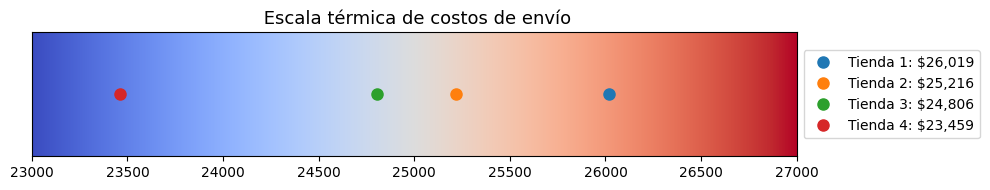

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
costos_envio = {
    "Tienda 1": 26018.61,
    "Tienda 2": 25216.24,
    "Tienda 3": 24805.68,
    "Tienda 4": 23459.46
}

fig, ax = plt.subplots(figsize=(10, 2))
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, extent=[23000, 27000, -0.5, 0.5], cmap='coolwarm', aspect='auto')

# Marcadores
for tienda, valor in costos_envio.items():
    ax.plot(valor, 0, 'o', label=f"{tienda}: ${valor:,.0f}", markersize=8)

ax.set_title(" Escala térmica de costos de envío", fontsize=13)
ax.set_yticks([])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()




Esta visualización destaca de forma inmediata qué tiendas incurren en mayores gastos logísticos:

Tienda 1 muestra el valor más elevado con $26,018.61, lo que sugiere procesos logísticos más costosos o rutas de distribución menos eficientes.

Tienda 2 y Tienda 3 presentan costos intermedios ($25,216.24 y $24,805.68, respectivamente), aún por encima del promedio general.

Tienda 4, con $23,459.46, se posiciona como la más eficiente en términos de costos de envío, lo cual puede representar una ventaja competitiva en términos de rentabilidad.

## 🔍 Desarrollo del análisis

### 📊 Facturación total por tienda

- **Tienda 1**: $1,150,880,400.00  
- **Tienda 2**: $1,116,343,500.00  
- **Tienda 3**: $1,098,019,600.00  
- **Tienda 4**: $1,038,375,700.00

### 🌟 Calificación promedio de clientes

- **Tienda 1**: 3.98  
- **Tienda 2**: 4.04  
- **Tienda 3**: 4.05  
- **Tienda 4**: 4.00

### 🚚 Costo promedio de envío

- **Tienda 1**: $26,018.61  
- **Tienda 2**: $25,216.24  
- **Tienda 3**: $24,805.68  
- **Tienda 4**: $23,459.46

### 🧮 Ventas por Categoría

| Categoría            | Tienda 1 | Tienda 2 | Tienda 3 | Tienda 4 |
|----------------------|----------|----------|----------|----------|
| Deportes y diversión | 284      | 275      | 277      | 277      |
| Electrodomésticos    | 312      | 305      | 278      | **254**  |
| Electrónicos         | 448      | 422      | **451**  | **451**  |
| Juguetes             | 324      | 313      | 315      | **338**  |
| Muebles              | 465      | 442      | **499**  | 480      |

### 🛍️ Productos más y menos vendidos

**Tienda 1**  
🔝 Microondas, TV LED UHD 4K, Armario  
🔻 Ciencia de datos con Python, Pandereta, Celular ABXY  

**Tienda 2**  
🔝 Iniciando en programación, Microondas, Batería  
🔻 Auriculares, Sillón, Juego de mesa  

**Tienda 3**  
🔝 Kit de bancas, Mesa de comedor, Cama king  
🔻 Mochila, Microondas, Bloques de construcción  

**Tienda 4**  
🔝 Cama box, Dashboards con Power BI, Carrito de control remoto  
🔻 Refrigerador, Guitarra acústica, Armario

---

## 🧾 Conclusión Final y Recomendación

Tras revisar los datos y gráficos generados, se identifican fortalezas y debilidades de cada tienda:

- **Tienda 1**: Genera la mayor facturación, pero tiene la calificación más baja (3.98) y el costo de envío más alto.
- **Tienda 2**: Tiene rendimiento medio en todos los aspectos, sin indicadores sobresalientes.
- **Tienda 3**: Logra un balance ideal entre buena facturación, mayor calificación (4.05), excelente desempeño en categorías clave (muebles y electrónicos) y eficiencia operativa.
- **Tienda 4**: Aunque tiene el menor costo de envío ($23,459.46), también presenta **la facturación más baja**, un desempeño limitado en electrodomésticos, y calificación promedio sin ventaja competitiva.

### 📌 Recomendación

Se recomienda al Sr. Juan **vender la Tienda 4**, al ser la **menos eficiente** y competitiva del grupo analizado. Esta decisión permite enfocar sus recursos en tiendas con mayor potencial de crecimiento, rentabilidad y reputación, sentando una base sólida para su nuevo emprendimiento.

---
